# Ejercicio: Tablas de Crecimiento

Graficar las curvas correspondientes a cada percentil para niños y niñas.

Link: [Percentile Data Files with LMS Values](https://www.cdc.gov/growthcharts/percentile_data_files.htm)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
weight_age_info = pd.read_csv("../input/wtageinf.csv")
#length_age_info = pd.read_csv("../input/lenageinf.csv")

In [4]:
weight_age_info.shape

(76, 14)

In [5]:
weight_age_info.dropna().shape

(76, 14)

In [6]:
display(weight_age_info.head(10))
display(weight_age_info.tail(10))

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
66,2,27.5,-0.841935,12.596223,0.110144,10.406644,10.641710,11.023380,11.720466,12.596223,13.600594,14.638729,15.332495,15.816318
67,2,28.5,-0.867889,12.746209,0.111061,10.519902,10.758192,11.145454,11.853924,12.746209,13.772713,14.837433,15.551131,16.049903
68,2,29.5,-0.892103,12.895172,0.112023,10.631115,10.872728,11.265746,11.985917,12.895172,13.944404,15.036464,15.770701,16.284906
69,2,30.5,-0.914719,13.043572,0.113023,10.740782,10.985812,11.384743,12.116919,13.043572,14.116113,15.236260,15.991643,16.521765
70,2,31.5,-0.935880,13.191808,0.114056,10.849350,11.097886,11.502878,12.247348,13.191808,14.288225,15.437192,16.214324,16.760846
71,2,32.5,-0.955723,13.340229,0.115115,10.957219,11.209345,11.620537,12.377573,13.340229,14.461065,15.639570,16.439044,17.002447
72,2,33.5,-0.974381,13.489134,0.116193,11.064747,11.320538,11.738058,12.507913,13.489134,14.634908,15.843647,16.666048,17.246809
73,2,34.5,-0.991981,13.638774,0.117286,11.172248,11.431774,11.855740,12.638647,13.638774,14.809981,16.049626,16.895526,17.494115
74,2,35.5,-1.008641,13.789365,0.118387,11.279999,11.543323,11.973842,12.770013,13.789365,14.986470,16.257667,17.127623,17.744504
75,2,36.0,-1.016653,13.865074,0.118939,11.334045,11.599289,12.033121,12.835999,13.865074,15.075293,16.362500,17.244688,17.870885


In [7]:
weight_age_info.describe()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.500000,18.000000,-0.159380,10.500653,0.113703,8.555646,8.774327,9.123940,9.746218,10.500653,11.331908,12.156645,12.689973,13.054045
std,0.503322,10.994544,0.627920,2.997212,0.009747,2.581549,2.619041,2.684415,2.815592,2.997212,3.223077,3.471963,3.645593,3.769782
min,1.000000,0.000000,-1.016653,3.399186,0.105084,2.355451,2.526904,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
25%,1.000000,8.500000,-0.562695,8.681272,0.108187,7.040830,7.228790,7.527762,8.054299,8.681272,9.355576,10.015958,10.440824,10.726893
50%,1.500000,18.000000,-0.188634,11.351482,0.110096,9.344228,9.568433,9.927990,10.570385,11.351482,12.212520,13.064862,13.613989,13.987582
75%,2.000000,27.500000,-0.018852,12.884560,0.115375,10.576634,10.832864,11.244542,11.982543,12.884560,13.885523,14.877694,15.570395,16.051213
max,2.000000,36.000000,1.815151,14.329944,0.152385,11.759784,12.039910,12.492682,13.312776,14.329944,15.477724,16.642369,17.408165,17.936247


In [8]:
weight_age_info.Sex.unique()  # Valores posibles

array([1, 2])

Tiramos las columnas *L*, *M*, y *S* ya que estan no nos seran de utilidad.

In [9]:
weight_age_info = weight_age_info.drop(columns=['L', 'M', 'S'])

Filtramos la tabla para obtener los valores correspondientes para los Niños y las Niñas.

In [10]:
male = weight_age_info[weight_age_info.Sex == 1].drop(columns=['Sex'])
female = weight_age_info[weight_age_info.Sex == 2].drop(columns=['Sex'])

In [11]:
male.head(10)

,Agemos,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,0.0,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,0.5,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1.5,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,2.5,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,3.5,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,4.5,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,5.5,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,6.5,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,7.5,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,8.5,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [12]:
female.head(10)

,Agemos,P3,P5,P10,P25,P50,P75,P90,P95,P97
38,0.0,2.414112,2.547905,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
39,0.5,2.756917,2.894442,3.101767,3.437628,3.797528,4.145594,4.450126,4.628836,4.743582
40,1.5,3.402293,3.547610,3.770157,4.138994,4.544777,4.946766,5.305632,5.519169,5.657379
41,2.5,3.997806,4.150639,4.387042,4.784820,5.230584,5.680083,6.087641,6.332837,6.492574
42,3.5,4.547383,4.707123,4.955926,5.379141,5.859961,6.351512,6.802770,7.076723,7.256166
43,4.5,5.054539,5.220488,5.480295,5.925888,6.437588,6.966524,7.457119,7.757234,7.954730
44,5.5,5.522500,5.693974,5.963510,6.428828,6.967850,7.530180,8.056331,8.380330,8.594413
45,6.5,5.954272,6.130641,6.408775,6.891533,7.454854,8.047178,8.605636,8.951544,9.180938
46,7.5,6.352668,6.533373,6.819122,7.317373,7.902436,8.521877,9.109878,9.476009,9.719621
47,8.5,6.720328,6.904886,7.197414,7.709516,8.314178,8.958324,9.573546,9.958480,10.215388


In [13]:
print("Male shape =", male.shape)
print("Female shape =", female.shape)

Male shape = (38, 10)
Female shape = (38, 10)


Graficamos las tablas de creciemiento para los Niños y las Niñas

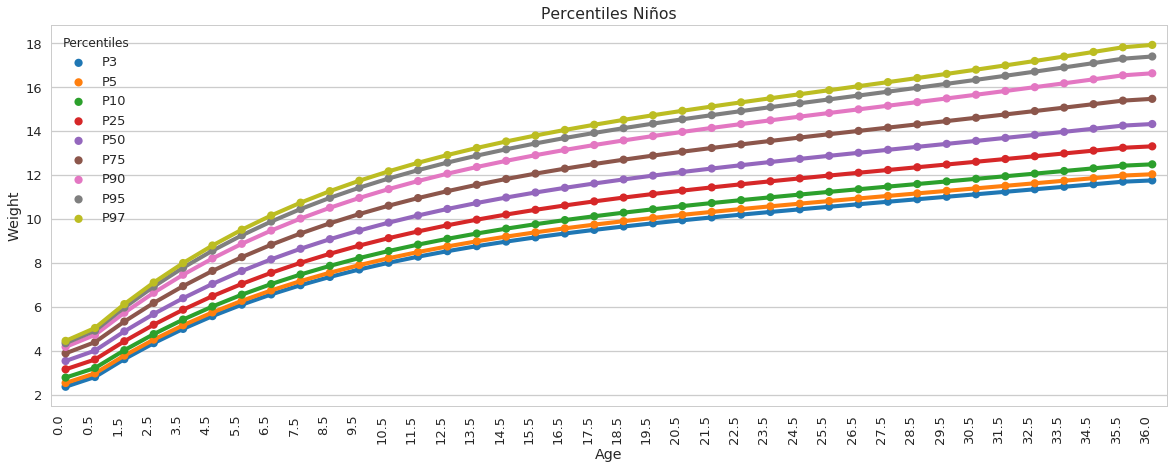

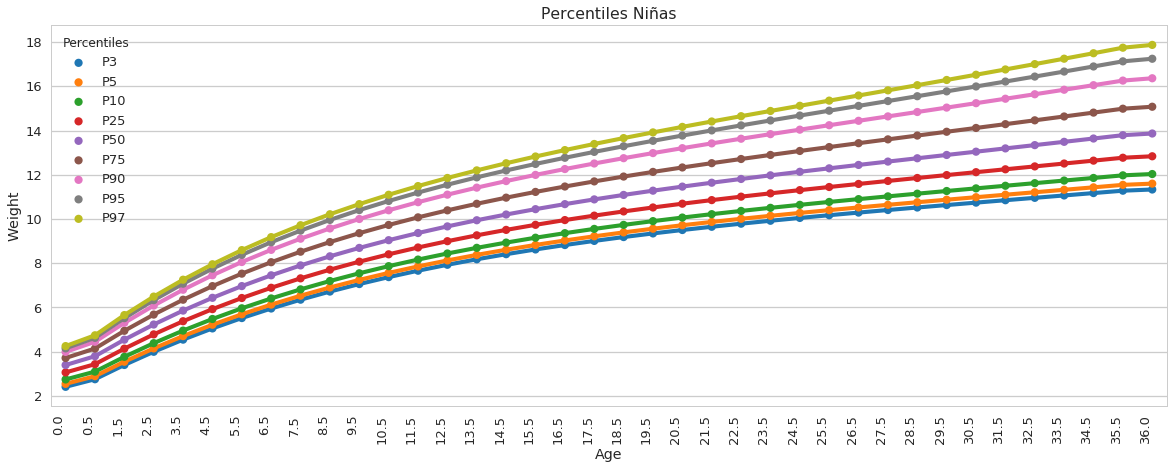

In [14]:
#https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn?rq=1
#https://github.com/mwaskom/seaborn/issues/867

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

df_male = male.melt('Agemos', var_name='Percentiles',  value_name='vals')

ax1 = sns.pointplot(x="Agemos", y="vals", hue='Percentiles', data=df_male, markers=".")
ax1.set_title("Percentiles Niños")
ax1.set_xlabel("Age");
ax1.set_ylabel("Weight");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right");

# ================================================================================== #

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

df_female = female.melt('Agemos', var_name='Percentiles',  value_name='vals')

ax2 = sns.pointplot(x="Agemos", y="vals", hue='Percentiles', data=df_female, markers=".")
ax2.set_title("Percentiles Niñas")
ax2.set_xlabel("Age");
ax2.set_ylabel("Weight");
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right");